In [1]:
from z3 import *

# Knights and Knaves, Part 1
Source: https://www.popularmechanics.com/science/math/a14382121/riddle-of-the-week-43-knights-and-knaves-part-1/

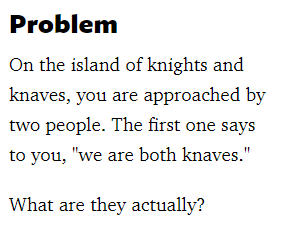

In [2]:
Object = DeclareSort('Object')

isKnight = Function('isKnight', Object, BoolSort())
isLiar = Function('isLiar', Object, BoolSort())

# model the fact that all knights tell the truth
x = Const('x', Object)
all_knights_tell_truth = ForAll([x], isKnight(x) == Not(isLiar(x)))

# model the two people
p1 = Const('person1', Object)
p2 = Const('person2', Object)

# model p1 saying they are both knaves
both_knaves = And(Not(isKnight(p1)), Not(isKnight(p2)))
p1_say_both_knaves = Implies(isKnight(p1), both_knaves)

In [3]:
s = Solver()

In [4]:
s.add(all_knights_tell_truth)
s.add(p1_say_both_knaves)
s.check()

sat

In [5]:
# if we assume that p1 is a knight ...
s.push()
s.add(isKnight(p1) == True)
s.check()

unsat

In [6]:
# if we assume p1 is a knave
s.pop()
s.push()
s.add(Not(isKnight(p1)) == True)
s.check()

sat

In [7]:
m = s.model()
print(f"P1 is a knight: {m.evaluate(isKnight(p1))}")
print(f"P2 is a knight: {m.evaluate(isKnight(p2))}")

P1 is a knight: False
P2 is a knight: False


In [8]:
# if we assume p1 is a knave and p2 is a knight
s.pop()
s.add(isKnight(p1) == False, isKnight(p2) == True)
s.check()

sat

In [9]:
m = s.model()
print(f"P1 is a knight: {m.evaluate(isKnight(p1))}")
print(f"P2 is a knight: {m.evaluate(isKnight(p2))}")

P1 is a knight: False
P2 is a knight: True


So, person 1 is definitely a knave but person 2 could be a knight or a knave.

# Knights and Knaves, Part 2
Source: https://www.popularmechanics.com/science/math/a14435655/riddle-of-the-week-44-knights-and-knaves-part-2/

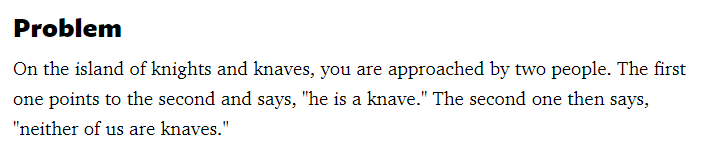

In [10]:
Object = DeclareSort('Object')

isKnight = Function('isKnight', Object, BoolSort())
isLiar = Function('isLiar', Object, BoolSort())

# model the fact that all knights tell the truth
x = Const('x', Object)
all_knights_tell_truth = ForAll([x], isKnight(x) == Not(isLiar(x)))

# model the two people
p1 = Const('person1', Object)
p2 = Const('person2', Object)

# model p1 says p2 is a knave
p1_claim_p2_is_knave = Implies(isKnight(p1), Not(isKnight(p2)))

# model p2 saying neither of them is a knave i.e. both are knights
p2_claim_both_knights = Implies(isKnight(p2), And(isKnight(p1), isKnight(p2)))

In [11]:
s = Solver()
s.add(all_knights_tell_truth, p1_claim_p2_is_knave, p2_claim_both_knights)
s

[ForAll(x, isKnight(x) == Not(isLiar(x))),
 Implies(isKnight(person1), Not(isKnight(person2))),
 Implies(isKnight(person2),
         And(isKnight(person1), isKnight(person2)))]

In [12]:
# assume p1 is a knight
s.push()
s.add(isKnight(p1) == True)
s.check()

sat

In [13]:
# assume p1 is a knight and p2 is a knight
s.push()
s.add(isKnight(p2) == True)
s.check()

unsat

In [14]:
# assume p1 is a knight and p2 is a knave
s.pop()
s.add(isKnight(p2) == False)
s.check()

sat

Therefore, Person 1 must be a knight and Person 2 must be a knave.

# Knights and Knaves, Part 3
Source: https://www.popularmechanics.com/science/math/a14478700/riddle-of-the-week-45-knights-and-knaves-part-3/


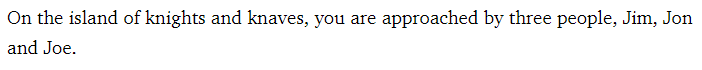

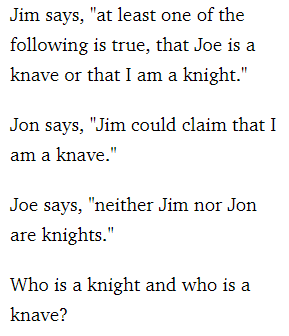

In [15]:
Object = DeclareSort('Object')

isKnight = Function('isKnight', Object, BoolSort())
isLiar = Function('isLiar', Object, BoolSort())

# model the fact that all knights tell the truth
x = Const('x', Object)
all_knights_tell_truth = ForAll([x], isKnight(x) == Not(isLiar(x)))

# model the people
jim = Const('Jim', Object)
jon = Const('Jon', Object)
joe = Const('Joe', Object)

In [16]:
# jim says
joe_knave_or_jim_knave = Or(isKnight(jim), Not(isKnight(joe)))
jim_says = Implies(isKnight(jim), joe_knave_or_jim_knave)

# jon says
jon_claim_on_jim = Implies(isKnight(jim), Not(isKnight(jon)))
jon_says = Implies(isKnight(jon), jon_claim_on_jim)

# joe
joe_says = Implies(isKnight(jon), And(Not(isKnight(jim)), Not(isKnight(jon))))

In [17]:
s = Solver()
s.add(all_knights_tell_truth, jim_says, jon_says, joe_says)
s

[ForAll(x, isKnight(x) == Not(isLiar(x))),
 Implies(isKnight(Jim),
         Or(isKnight(Jim), Not(isKnight(Joe)))),
 Implies(isKnight(Jon),
         Implies(isKnight(Jim), Not(isKnight(Jon)))),
 Implies(isKnight(Jon),
         And(Not(isKnight(Jim)), Not(isKnight(Jon))))]

In [18]:
from itertools import product


choices = product([True, False], [True, False], [True, False])

for choice in choices:
    is_knight_jim, is_knight_jon, is_knight_joe = choice

    s.push()
    
    s.add(isKnight(jim) == is_knight_jim, 
          isKnight(jon) == is_knight_jon, 
          isKnight(joe) == is_knight_joe)
    result = s.check()
    
    if result.r == 1:
        print(f"isKnight(jim): {is_knight_jim}")
        print(f"isKnight(jon): {is_knight_jon}")
        print(f"isKnight(joe): {is_knight_joe}")
        print("\n")
        print(f"Result: {result}")
        print("\n")

    s.pop()

isKnight(jim): True
isKnight(jon): False
isKnight(joe): True


Result: sat


isKnight(jim): True
isKnight(jon): False
isKnight(joe): False


Result: sat


isKnight(jim): False
isKnight(jon): False
isKnight(joe): True


Result: sat


isKnight(jim): False
isKnight(jon): False
isKnight(joe): False


Result: sat




Not sure if problem is correctly modelled....